# Predicting Income with Random Forests
In this project, we will be using a dataset containing census information from UCI’s Machine Learning Repository.

By using this census data with a random forest, we will try to predict whether or not a person makes more than $50,000.

In [50]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
from matplotlib import pyplot as plt

In [23]:
# There’s a small problem with our data that is a little hard to catch — every string has an extra space at the start.
# To fix this, we can add the parameter delimiter = ", " to our read_csv() function.
df = pd.read_csv('income.csv',delimiter =', ')
print(df.info())
df.head()

<ipython-input-23-955430103bde>:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv('income.csv',delimiter =', ')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [24]:
print(df.columns)

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')


# Format The Data For Spitting

In [26]:
df["sex-int"] = df["sex"].apply(lambda row: 0 if row == "Male" else 1)
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,sex-int
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,1


In [57]:
features = df[['age', 'education-num',
       'capital-gain', 'capital-loss', 'hours-per-week','sex-int']]
labels = df['income']
# Splitting the data
train_x,test_x,train_y,test_y = train_test_split(features,labels,random_state=1)

# Creating The Random Forest

In [58]:
# Making Our base model
tree = RandomForestClassifier(random_state=0)
tree.fit(train_x,train_y)
print(tree.score(test_x,test_y))
print(tree.feature_importances_)

0.8363837366416902
[0.30456818 0.18746302 0.20368553 0.07380933 0.18016662 0.05030733]


1 0.8127994103918438
2 0.8127994103918438
3 0.8093600294804079
4 0.8331900257953568
5 0.8377349219997543
6 0.8451050239528314
7 0.8454735290504852
8 0.8503869303525365
9 0.8503869303525365
10 0.8508782704827417
11 0.8486672398968186
12 0.8490357449944724
13 0.8485444048642673
14 0.8458420341481391
15 0.8433853334971134
16 0.8398231175531261
17 0.8373664169021005
18 0.8358923965114851
19 0.831961675469844
20 0.830241985014126
21 0.8295049748188184
22 0.8288907996560619
23 0.8272939442328953
24 0.8276624493305491
25 0.8268026041026901
26 0.827171109200344
27 0.827171109200344
28 0.8244687384842156
29 0.8256970888097286
30 0.8256970888097286
31 0.8239773983540105
32 0.8250829136469722
33 0.8238545633214592
34 0.825451418744626
35 0.8250829136469722
36 0.825451418744626
37 0.8258199238422799
38 0.8258199238422799
39 0.8258199238422799


Text(0.5, 1.0, 'Finding Best Max Depth')

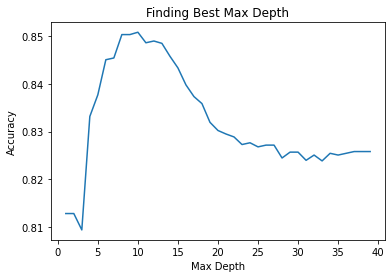

In [54]:
# Comparing with Decision Tree
score =[]
for i in range(1,40):
    model = DecisionTreeClassifier(random_state=0,max_depth=i)
    model.fit(train_x,train_y)
    score.append(model.score(test_x,test_y))
    print(i,model.score(test_x,test_y))
sns.lineplot(x=range(1,40),y=score)
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Finding Best Max Depth')

Single does better than Forest when max_depth is 10 but Forest ability to limit overfitting without substantially increasing error due to bias is why they are such powerful models. One way Random Forests reduce variance is by training on different samples of the data.So, our Random Forest of 84% accuracy is better than a single decision Tree.